In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D


In [3]:
values = pd.read_csv('MEP_2.csv')
print(values.shape)
#values = values.drop(values.columns[0], axis=1)
#Удаляем дублирующий индекс и 9_temperature(Из-за высокого шума и избыточной чувствительности)
#values = values.drop(values.columns[21], axis=1) #
values.head(2)

(216, 77)


,Т,Y1,Y2,X1,X2,X3,X4,X5,X6,X7,...,Z88,Z89,Z90,Z91,Z92,Z93,Z94,Z95,Z98,Z99
0,1/1/2005,1486.333333,2.62,99.4,515,1838.0,2859,386.0,148.1,80.9,...,151.5,1254.3,4298.2,3094,309,7168,9615,1624,1486.33,632.76
1,2/1/2005,1486.333333,1.23,99.1,530,1832.0,2542,357.7,184.5,89.9,...,157.5,1281.5,4373.8,2811,335,7647,9653,1905,1486.33,632.76


In [4]:
values.head(2)

,Т,Y1,Y2,X1,X2,X3,X4,X5,X6,X7,...,Z88,Z89,Z90,Z91,Z92,Z93,Z94,Z95,Z98,Z99
0,1/1/2005,1486.333333,2.62,99.4,515,1838.0,2859,386.0,148.1,80.9,...,151.5,1254.3,4298.2,3094,309,7168,9615,1624,1486.33,632.76
1,2/1/2005,1486.333333,1.23,99.1,530,1832.0,2542,357.7,184.5,89.9,...,157.5,1281.5,4373.8,2811,335,7647,9653,1905,1486.33,632.76


In [28]:
# ['Z58','X11','Z70','X12','Z66','X26','Z11','Z21','Z9','Z10','X10','Z25','Z71','X25','Z62']
# Для инфляции
#DF_hi_korr = values[['X11','X12','X26','Z11','Z9','Z10','X10','X25','Z62']]
print(DF_hi_korr.shape)


(216, 6)


In [125]:
#Для ВВП
DF_hi_korr = values[['Z26','Z27','Z7','Z28','Z10','X5','X17','X8','Z60']]
print(DF_hi_korr.shape)

(216, 9)


In [126]:
x_train = pd.concat([DF_hi_korr.iloc[:50] ,DF_hi_korr.iloc[100:]])
x_train = x_train.reset_index(drop=True)

x_test = DF_hi_korr.iloc[50:100]

print(x_train.shape,x_test.shape)

(166, 9) (50, 9)


<Axes: >

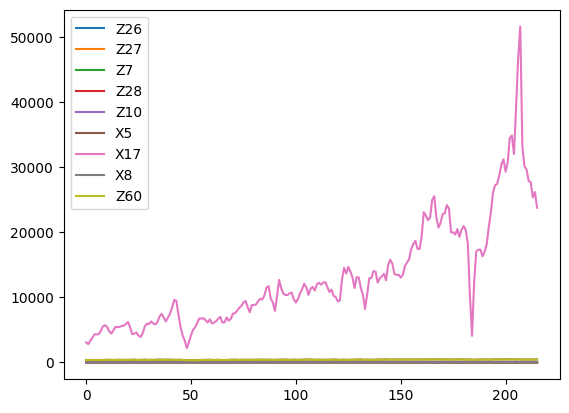

In [127]:
DF_hi_korr.plot()

In [128]:
y_train_VVP = pd.concat([values[:50].filter(like='Y1'),values[105:].filter(like='Y1')])
y_train_VVP = y_train_VVP.reset_index(drop=True)
# y_train_INF = pd.concat([values[:50].filter(like='Y2'),values[105:].filter(like='Y2')])
# y_train_INF = y_train_INF.reset_index(drop=True)
print(y_train_VVP.shape,y_train_VVP.shape)


(161, 1) (161, 1)


In [129]:

y_test_vvp = values[50:95].filter(like='Y1')
y_test_vvp = y_test_vvp.reset_index(drop=True)
# y_test_inf = values[50:95].filter(like='Y2')
# y_test_inf = y_test_inf.reset_index(drop=True)

<Axes: >

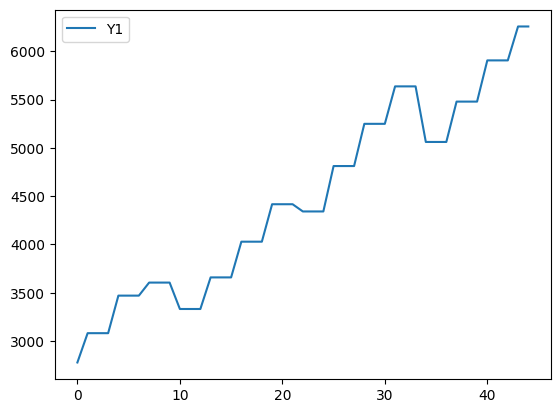

In [130]:
y_test_vvp.plot()

<Axes: >

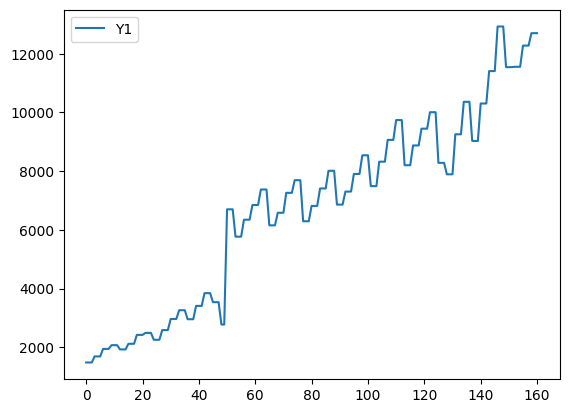

In [110]:
y_train_VVP.plot()

<Axes: >

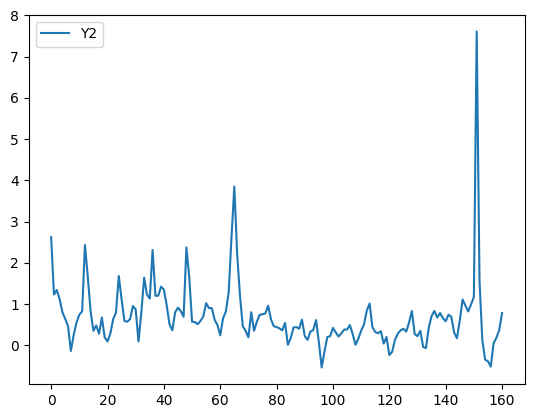

In [111]:
y_train_INF.plot()

In [131]:
time_steps=6
features = 9

In [132]:
# Инициализация массива x_train
x_train2 = np.zeros((x_train.shape[0] - time_steps + 1, time_steps, features))

# Заполнение массива x_train окнами размером time_steps
for i in range(x_train.shape[0] - time_steps + 1):
    x_train2[i] = x_train.iloc[i:i+time_steps].values

print(x_train2.shape)

(161, 6, 9)


In [133]:
# Инициализация массива x_test
x_test2 = np.zeros((x_test.shape[0] - time_steps + 1, time_steps, features))

# Заполнение массива x_test окнами размером time_steps
for i in range(x_test.shape[0] - time_steps + 1):
    x_test2[i] = x_test.iloc[i:i+time_steps].values

print(x_test2.shape)

(45, 6, 9)


In [115]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [172]:
model2 = Sequential()
model2.add(LSTM(units=150, input_shape=(time_steps, features)))
model2.add(Dense(units = 100))
model2.add(Dense(units = 10))
model2.add(Dense(units=1))
model2.compile(loss='mae', optimizer='adam')
model2.fit(x_train2, y_train_VVP, epochs=22, batch_size=16, validation_data=(x_test2, y_test_vvp))

Epoch 1/22
11/11 [==============================] - 3s 64ms/step - loss: 6732.5146 - val_loss: 4469.7236
Epoch 2/22
11/11 [==============================] - 0s 16ms/step - loss: 6723.2485 - val_loss: 4457.4546
Epoch 3/22
11/11 [==============================] - 0s 16ms/step - loss: 6706.2300 - val_loss: 4434.7915
Epoch 4/22
11/11 [==============================] - 0s 16ms/step - loss: 6679.2563 - val_loss: 4400.4033
Epoch 5/22
11/11 [==============================] - 0s 10ms/step - loss: 6639.1445 - val_loss: 4350.2441
Epoch 6/22
11/11 [==============================] - 0s 9ms/step - loss: 6580.8594 - val_loss: 4281.1299
Epoch 7/22
11/11 [==============================] - 0s 11ms/step - loss: 6502.1470 - val_loss: 4188.4443
Epoch 8/22
11/11 [==============================] - 0s 12ms/step - loss: 6399.8379 - val_loss: 4071.4221
Epoch 9/22
11/11 [==============================] - 0s 12ms/step - loss: 6271.2012 - val_loss: 3925.7456
Epoch 10/22
11/11 [==============================] - 0s 

In [117]:
model2.fit(x_train2, y_train_VVP, epochs=50, batch_size=8, validation_data=(x_test2, y_test_vvp))

Epoch 1/50
21/21 [==============================] - 0s 6ms/step - loss: 6645.8530 - val_loss: 4388.5791
Epoch 2/50
21/21 [==============================] - 0s 6ms/step - loss: 6645.5630 - val_loss: 4388.2896
Epoch 3/50
21/21 [==============================] - 0s 5ms/step - loss: 6645.2725 - val_loss: 4387.9995
Epoch 4/50
21/21 [==============================] - 0s 5ms/step - loss: 6644.9839 - val_loss: 4387.7095
Epoch 5/50
21/21 [==============================] - 0s 5ms/step - loss: 6644.6934 - val_loss: 4387.4189
Epoch 6/50
21/21 [==============================] - 0s 5ms/step - loss: 6644.4038 - val_loss: 4387.1294
Epoch 7/50
21/21 [==============================] - 0s 4ms/step - loss: 6644.1128 - val_loss: 4386.8389
Epoch 8/50
21/21 [==============================] - 0s 5ms/step - loss: 6643.8228 - val_loss: 4386.5493
Epoch 9/50
21/21 [==============================] - 0s 5ms/step - loss: 6643.5332 - val_loss: 4386.2588
Epoch 10/50
21/21 [==============================] - 0s 5ms/step

In [173]:
pref_dfv1 = model2.predict(x_test2)

2/2 [==============================] - 0s 5ms/step


In [174]:
pref_dfv1

array([[4574.244 ],
       [4574.23  ],
       [4574.4707],
       [4575.7256],
       [4640.0376],
       [4623.199 ],
       [4623.221 ],
       [4623.2715],
       [4623.365 ],
       [4665.5146],
       [4666.853 ],
       [4672.914 ],
       [4673.7666],
       [4673.8813],
       [4673.897 ],
       [4673.897 ],
       [4673.897 ],
       [4673.883 ],
       [4673.8315],
       [4673.452 ],
       [4670.6865],
       [4670.696 ],
       [4669.2476],
       [4673.451 ],
       [4673.831 ],
       [4673.8833],
       [4673.8906],
       [4673.891 ],
       [4673.897 ],
       [4673.883 ],
       [4673.8315],
       [4673.4536],
       [4670.6577],
       [4670.6577],
       [4670.6577],
       [4673.4536],
       [4673.8325],
       [4673.8843],
       [4673.897 ],
       [4673.897 ],
       [4673.897 ],
       [4673.8853],
       [4673.834 ],
       [4673.466 ],
       [4670.7837]], dtype=float32)

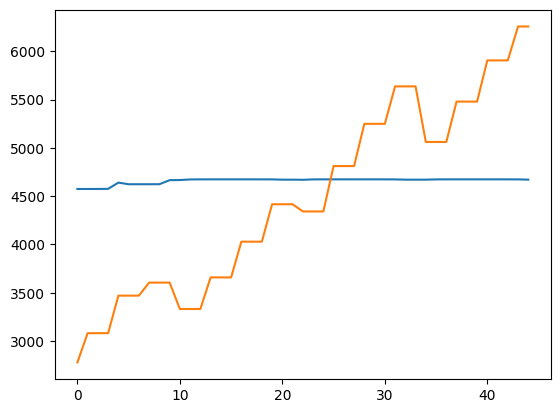

In [175]:
plt.plot(pref_dfv1)
plt.plot(y_test_vvp)

In [177]:
# Создание LSTM модели для ВВП
model_v = Sequential()
model_v.add(LSTM(50, input_shape=(time_steps, features)))

model_v.add(Dense(200))
model_v.add(Dense(100))

model_v.add(Dense(1))

# Компиляция модели
model_v.compile(optimizer='adam', loss='mse')

# Обучение модели
model_v.fit(x_train2, y_train_VVP, epochs=300, batch_size=16, validation_data=(x_test2, y_test_vvp))

Epoch 1/300
11/11 [==============================] - 2s 44ms/step - loss: 55821560.0000 - val_loss: 20944660.0000
Epoch 2/300
11/11 [==============================] - 0s 8ms/step - loss: 55674732.0000 - val_loss: 20799644.0000
Epoch 3/300
11/11 [==============================] - 0s 8ms/step - loss: 55389068.0000 - val_loss: 20517754.0000
Epoch 4/300
11/11 [==============================] - 0s 8ms/step - loss: 54829412.0000 - val_loss: 19995212.0000
Epoch 5/300
11/11 [==============================] - 0s 8ms/step - loss: 53860104.0000 - val_loss: 19120236.0000
Epoch 6/300
11/11 [==============================] - 0s 8ms/step - loss: 52256064.0000 - val_loss: 17821984.0000
Epoch 7/300
11/11 [==============================] - 0s 8ms/step - loss: 49924652.0000 - val_loss: 16024838.0000
Epoch 8/300
11/11 [==============================] - 0s 8ms/step - loss: 46873968.0000 - val_loss: 13773983.0000
Epoch 9/300
11/11 [==============================] - 0s 6ms/step - loss: 42723160.0000 - val_lo

In [ ]:
model_v.fit(x_train2, y_train_VVP, epochs=50, batch_size=4, validation_data=(x_test2, y_test_vvp))

2/2 [==============================] - 0s 5ms/step


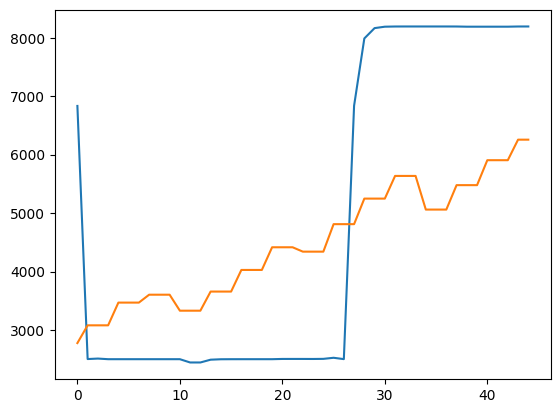

In [179]:
pred_dfv = model_v.predict(x_test2)
plt.plot(pred_dfv)
plt.plot(y_test_vvp)

In [183]:
# Для инфляции
DF_hi_korr = values[['X11','X12','X26','Z11','Z9','Z10','X10','X25','Z62']]
print(DF_hi_korr.shape)

x_train = pd.concat([DF_hi_korr.iloc[:50] ,DF_hi_korr.iloc[100:]])
x_train = x_train.reset_index(drop=True)

x_test = DF_hi_korr.iloc[50:100]
x_test = x_test.reset_index(drop=True)

print(x_train.shape,x_test.shape)


(216, 9)
(166, 9) (50, 9)


<Axes: >

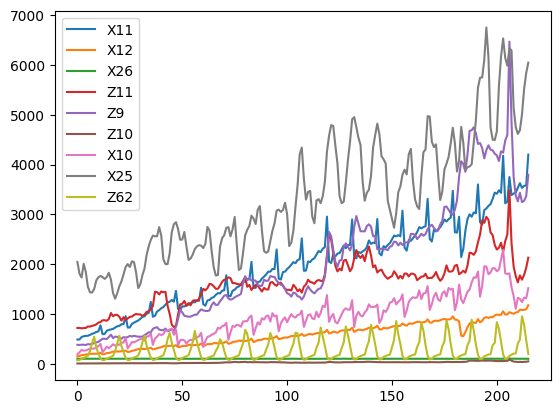

In [184]:
DF_hi_korr.plot()

In [185]:
# y_train_VVP = pd.concat([values[:50].filter(like='Y1'),values[105:].filter(like='Y1')])
# y_train_VVP = y_train_VVP.reset_index(drop=True)
y_train_INF = pd.concat([values[:50].filter(like='Y2'),values[105:].filter(like='Y2')])
y_train_INF = y_train_INF.reset_index(drop=True)
print(y_train_VVP.shape,y_train_VVP.shape)

(161, 1) (161, 1)


In [186]:
# y_test_vvp = values[50:95].filter(like='Y1')
# y_test_vvp = y_test_vvp.reset_index(drop=True)
y_test_inf = values[50:95].filter(like='Y2')
y_test_inf = y_test_inf.reset_index(drop=True)
print(y_test_vvp.shape,y_test_inf.shape)

(45, 1) (45, 1)


In [187]:
time_steps=6
features = 9

In [188]:
# Инициализация массива x_train
x_train2 = np.zeros((x_train.shape[0] - time_steps + 1, time_steps, features))

# Заполнение массива x_train окнами размером time_steps
for i in range(x_train.shape[0] - time_steps + 1):
    x_train2[i] = x_train.iloc[i:i+time_steps].values

print(x_train2.shape)

(161, 6, 9)


In [189]:
# Инициализация массива x_test
x_test2 = np.zeros((x_test.shape[0] - time_steps + 1, time_steps, features))

# Заполнение массива x_test окнами размером time_steps
for i in range(x_test.shape[0] - time_steps + 1):
    x_test2[i] = x_test.iloc[i:i+time_steps].values

print(x_test2.shape)

(45, 6, 9)


In [201]:
# Создание LSTM модели для ВВП
model_i = Sequential()
model_i.add(LSTM(164, input_shape=(time_steps, features)))
model_i.add(Dense(100))
model_i.add(Dense(30))
model_i.add(Dense(1))

# Компиляция модели
model_i.compile(optimizer='adam', loss='mse')

# Обучение модели
model_i.fit(x_train2, y_train_INF, epochs=50, batch_size=32, validation_data=(x_test2, y_test_inf))

Epoch 1/50
6/6 [==============================] - 2s 90ms/step - loss: 0.9366 - val_loss: 1.4361
Epoch 2/50
6/6 [==============================] - 0s 13ms/step - loss: 0.7786 - val_loss: 0.6550
Epoch 3/50
6/6 [==============================] - 0s 16ms/step - loss: 0.9161 - val_loss: 0.8880
Epoch 4/50
6/6 [==============================] - 0s 17ms/step - loss: 0.7682 - val_loss: 0.3937
Epoch 5/50
6/6 [==============================] - 0s 13ms/step - loss: 0.6482 - val_loss: 0.8430
Epoch 6/50
6/6 [==============================] - 0s 13ms/step - loss: 0.6383 - val_loss: 0.3135
Epoch 7/50
6/6 [==============================] - 0s 17ms/step - loss: 0.6147 - val_loss: 0.7796
Epoch 8/50
6/6 [==============================] - 0s 14ms/step - loss: 0.8002 - val_loss: 0.3122
Epoch 9/50
6/6 [==============================] - 0s 16ms/step - loss: 0.6766 - val_loss: 0.2409
Epoch 10/50
6/6 [==============================] - 0s 17ms/step - loss: 0.6693 - val_loss: 0.3975
Epoch 11/50
6/6 [============

In [202]:
# Обучение модели
model_i.fit(x_train2, y_train_INF, epochs=10, batch_size=8, validation_data=(x_test2, y_test_inf))

Epoch 1/10
21/21 [==============================] - 0s 10ms/step - loss: 0.5623 - val_loss: 0.3915
Epoch 2/10
21/21 [==============================] - 0s 8ms/step - loss: 0.6657 - val_loss: 0.4150
Epoch 3/10
21/21 [==============================] - 0s 8ms/step - loss: 0.6139 - val_loss: 0.2630
Epoch 4/10
21/21 [==============================] - 0s 8ms/step - loss: 0.6036 - val_loss: 0.4191
Epoch 5/10
21/21 [==============================] - 0s 9ms/step - loss: 0.6523 - val_loss: 0.4169
Epoch 6/10
21/21 [==============================] - 0s 8ms/step - loss: 0.8275 - val_loss: 0.7140
Epoch 7/10
21/21 [==============================] - 0s 9ms/step - loss: 0.6835 - val_loss: 0.3052
Epoch 8/10
21/21 [==============================] - 0s 9ms/step - loss: 0.6423 - val_loss: 0.4880
Epoch 9/10
21/21 [==============================] - 0s 9ms/step - loss: 0.8586 - val_loss: 0.3804
Epoch 10/10
21/21 [==============================] - 0s 9ms/step - loss: 0.6568 - val_loss: 0.3547


2/2 [==============================] - 0s 6ms/step


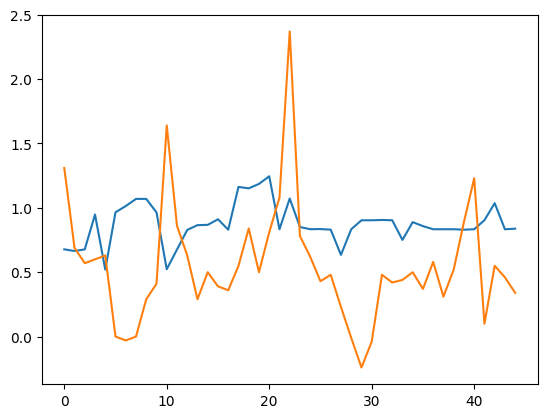

In [203]:
pred_df_i = model_i.predict(x_test2)
plt.plot(pred_df_i)
plt.plot(y_test_inf)